In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 

In [55]:
data = pd.read_csv('data/water_potability.csv')

In [56]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


- pH value: It is an indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

- Hardness: Hardness is mainly caused by calcium and magnesium salts. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

- Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

- Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

- Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

- Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

- Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

- Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

- Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [58]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


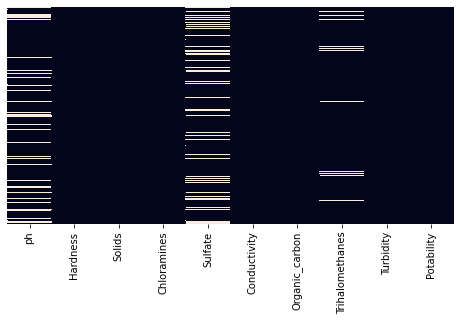

In [59]:
# visualize null values
plt.figure(figsize=(8,4))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False);

In [60]:
data.shape

(3276, 10)

There is a huge variation in mean, and we can see there are some missing values in ph,Sulfate and Trihalomethanes.

In [61]:
(data.isnull().sum()/len(data) * 100).sort_values(ascending=False)

Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Conductivity        0.000000
Organic_carbon      0.000000
Turbidity           0.000000
Potability          0.000000
dtype: float64

3.1 Handle Sulfate Column

In [62]:
data['Sulfate_null'] = np.where(data['Sulfate'].isnull(), 1, 0)
data['Sulfate'].fillna(data['Sulfate'].mean(), inplace=True)
data[['Sulfate', 'Sulfate_null']]

,Sulfate,Sulfate_null
0,368.516441,0
1,333.775777,1
2,333.775777,1
3,356.886136,0
4,310.135738,0
...,...,...
3271,359.948574,0
3272,333.775777,1
3273,333.775777,1
3274,333.775777,1


3.2 Handle pH Column

In [63]:
data['ph_null'] = np.where(data['ph'].isnull(), 1, 0)
data['ph'].fillna(data['ph'].mean(), inplace=True)

3.3 Handle Trihalomethanes Column

In [64]:
data['Trihalomethanes_null'] =np.where(data['Trihalomethanes'].isnull(),1,0)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(),inplace=True)

In [65]:
# Confirm missing value are filled
data.isnull().sum()

ph                      0
Hardness                0
Solids                  0
Chloramines             0
Sulfate                 0
Conductivity            0
Organic_carbon          0
Trihalomethanes         0
Turbidity               0
Potability              0
Sulfate_null            0
ph_null                 0
Trihalomethanes_null    0
dtype: int64

4. Visualization of Target Variable

Not Potable(0): 1998
Not Potable(1): 1278


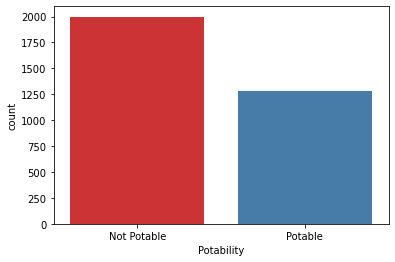

In [66]:
ax = sns.countplot(x=data['Potability'], palette='Set1')
ax.set_xticklabels(['Not Potable', 'Potable'])
print('Not Potable(0):', data['Potability'].value_counts()[0])
print('Not Potable(1):', data['Potability'].value_counts()[1])
plt.show()

In [67]:
#data['ph'][data['Potability']==0]

C:\Users\atale\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\atale\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\atale\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg,

Text(0.5, 1.0, 'Distribution of pH')

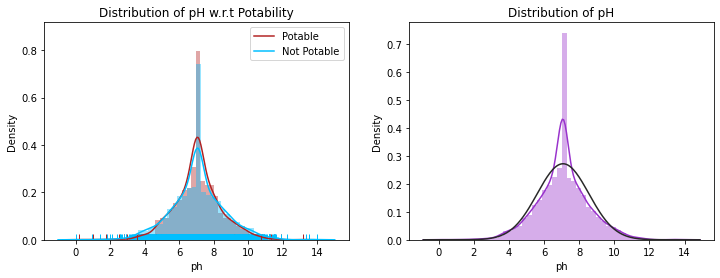

In [68]:
from scipy.stats import norm

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['ph'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['ph'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of pH w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['ph'],fit=norm,color='darkorchid')
plt.title('Distribution of pH')